<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.739051,81.944157,81.212673,69.312064,266.382090,530.590035,-996.810996,1527.401031
1,0.0,1.0,26.553495,21.344267,30.677807,87.973565,-462.506837,-285.957704,927.984266,-1213.941971
2,0.0,2.0,21.497699,56.977055,63.067177,63.665422,4017.734128,4232.941482,-139.819197,4372.760679
3,0.0,3.0,84.272274,94.520801,20.212336,85.708701,-7008.056514,-6713.342402,-423.684432,-6289.657970
4,0.0,4.0,58.684801,56.122717,47.975276,22.141641,2786.737003,2981.661439,789.397550,2192.263889
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.904638,97.859000,98.380871,79.084571,-7341.162962,-6966.933882,-1668.099955,-5298.833927
29996,999.0,26.0,23.821095,41.545497,45.807883,95.992204,-1358.703601,-1141.536922,2341.463002,-3482.999923
29997,999.0,27.0,55.775989,72.252762,92.906359,61.342063,1.029887,293.307060,-1304.263321,1597.570381
29998,999.0,28.0,98.591615,88.860211,45.622867,70.886683,-934.585153,-620.623777,919.857395,-1540.481172


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.739051,81.944157,81.212673,69.312064,266.382090,530.590035,-996.810996,1527.401031
1,0.0,1.0,26.553495,21.344267,30.677807,87.973565,-462.506837,-285.957704,927.984266,-1213.941971
2,0.0,2.0,21.497699,56.977055,63.067177,63.665422,4017.734128,4232.941482,-139.819197,4372.760679
3,0.0,3.0,84.272274,94.520801,20.212336,85.708701,-7008.056514,-6713.342402,-423.684432,-6289.657970
4,0.0,4.0,58.684801,56.122717,47.975276,22.141641,2786.737003,2981.661439,789.397550,2192.263889
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.904638,97.859000,98.380871,79.084571,-7341.162962,-6966.933882,-1668.099955,-5298.833927
29996,999.0,26.0,23.821095,41.545497,45.807883,95.992204,-1358.703601,-1141.536922,2341.463002,-3482.999923
29997,999.0,27.0,55.775989,72.252762,92.906359,61.342063,1.029887,293.307060,-1304.263321,1597.570381
29998,999.0,28.0,98.591615,88.860211,45.622867,70.886683,-934.585153,-620.623777,919.857395,-1540.481172


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    21.739051  81.944157  81.212673  69.312064   266.382090   
      1.0    26.553495  21.344267  30.677807  87.973565  -462.506837   
      2.0    21.497699  56.977055  63.067177  63.665422  4017.734128   
      3.0    84.272274  94.520801  20.212336  85.708701 -7008.056514   
      4.0    58.684801  56.122717  47.975276  22.141641  2786.737003   
...                ...        ...        ...        ...          ...   
999.0 25.0   88.904638  97.859000  98.380871  79.084571 -7341.162962   
      26.0   23.821095  41.545497  45.807883  95.992204 -1358.703601   
      27.0   55.775989  72.252762  92.906359  61.342063     1.029887   
      28.0   98.591615  88.860211  45.622867  70.886683  -934.585153   
      29.0   30.205715  77.616503  60.085072  22.903227   766.582720   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     530.590035  -996.810996  1527.401031  
      1.0    -285.957704   927.984266 -1213.941971  
      2.0    4232.941482  -139.819197  4372.760679  
      3.0   -6713.342402  -423.684432 -6289.657970  
      4.0    2981.661439   789.397550  2192.263889  
...                  ...          ...          ...  
999.0 25.0  -6966.933882 -1668.099955 -5298.833927  
      26.0  -1141.536922  2341.463002 -3482.999923  
      27.0    293.307060 -1304.263321  1597.570381  
      28.0   -620.623777   919.857395 -1540.481172  
      29.0    967.393237  1765.933852  -798.540615  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    21.739051  81.944157  81.212673  69.312064   266.382090   
      1.0    26.553495  21.344267  30.677807  87.973565  -462.506837   
      2.0    21.497699  56.977055  63.067177  63.665422  4017.734128   
      3.0    84.272274  94.520801  20.212336  85.708701 -7008.056514   
      4.0    58.684801  56.122717  47.975276  22.141641  2786.737003   
...                ...        ...        ...        ...          ...   
999.0 25.0   88.904638  97.859000  98.380871  79.084571 -7341.162962   
      26.0   23.821095  41.545497  45.807883  95.992204 -1358.703601   
      27.0   55.775989  72.252762  92.906359  61.342063     1.029887   
      28.0   98.591615  88.860211  45.622867  70.886683  -934.585153   
      29.0   30.205715  77.616503  60.085072  22.903227   766.582720   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     530.590035  -996.810996  1527.401031  
      1.0    -285.957704   927.984266 -1213.941971  
      2.0    4232.941482  -139.819197  4372.760679  
      3.0   -6713.342402  -423.684432 -6289.657970  
      4.0    2981.661439   789.397550  2192.263889  
...                  ...          ...          ...  
999.0 25.0  -6966.933882 -1668.099955 -5298.833927  
      26.0  -1141.536922  2341.463002 -3482.999923  
      27.0    293.307060 -1304.263321  1597.570381  
      28.0   -620.623777   919.857395 -1540.481172  
      29.0    967.393237  1765.933852  -798.540615  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.739051,81.944157,81.212673,69.312064,266.382090,530.590035,-996.810996,1527.401031
1,0.0,1.0,26.553495,21.344267,30.677807,87.973565,-462.506837,-285.957704,927.984266,-1213.941971
2,0.0,2.0,21.497699,56.977055,63.067177,63.665422,4017.734128,4232.941482,-139.819197,4372.760679
3,0.0,3.0,84.272274,94.520801,20.212336,85.708701,-7008.056514,-6713.342402,-423.684432,-6289.657970
4,0.0,4.0,58.684801,56.122717,47.975276,22.141641,2786.737003,2981.661439,789.397550,2192.263889
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.904638,97.859000,98.380871,79.084571,-7341.162962,-6966.933882,-1668.099955,-5298.833927
29996,999.0,26.0,23.821095,41.545497,45.807883,95.992204,-1358.703601,-1141.536922,2341.463002,-3482.999923
29997,999.0,27.0,55.775989,72.252762,92.906359,61.342063,1.029887,293.307060,-1304.263321,1597.570381
29998,999.0,28.0,98.591615,88.860211,45.622867,70.886683,-934.585153,-620.623777,919.857395,-1540.481172


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    21.739051  81.944157  81.212673  69.312064   266.382090   
      1.0    26.553495  21.344267  30.677807  87.973565  -462.506837   
      2.0    21.497699  56.977055  63.067177  63.665422  4017.734128   
      3.0    84.272274  94.520801  20.212336  85.708701 -7008.056514   
      4.0    58.684801  56.122717  47.975276  22.141641  2786.737003   
...                ...        ...        ...        ...          ...   
999.0 25.0   88.904638  97.859000  98.380871  79.084571 -7341.162962   
      26.0   23.821095  41.545497  45.807883  95.992204 -1358.703601   
      27.0   55.775989  72.252762  92.906359  61.342063     1.029887   
      28.0   98.591615  88.860211  45.622867  70.886683  -934.585153   
      29.0   30.205715  77.616503  60.085072  22.903227   766.582720   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     530.590035  -996.810996  1527.401031  
      1.0    -285.957704   927.984266 -1213.941971  
      2.0    4232.941482  -139.819197  4372.760679  
      3.0   -6713.342402  -423.684432 -6289.657970  
      4.0    2981.661439   789.397550  2192.263889  
...                  ...          ...          ...  
999.0 25.0  -6966.933882 -1668.099955 -5298.833927  
      26.0  -1141.536922  2341.463002 -3482.999923  
      27.0    293.307060 -1304.263321  1597.570381  
      28.0   -620.623777   919.857395 -1540.481172  
      29.0    967.393237  1765.933852  -798.540615  

[30000 rows x 8 columns]

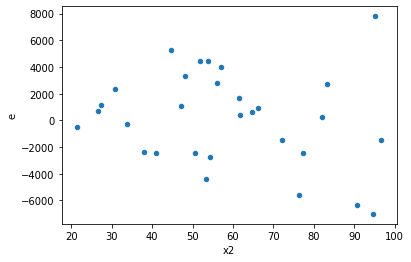

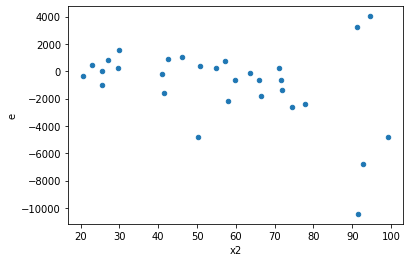

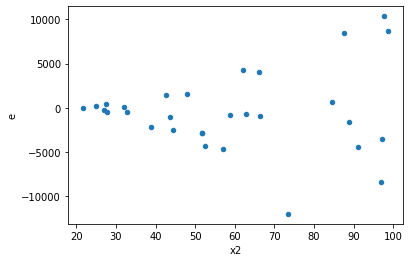

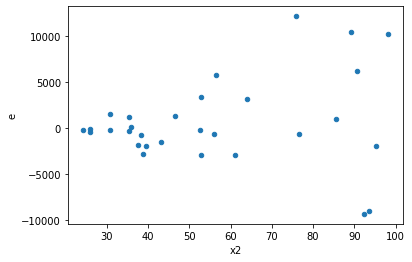

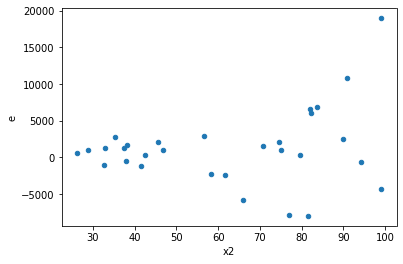

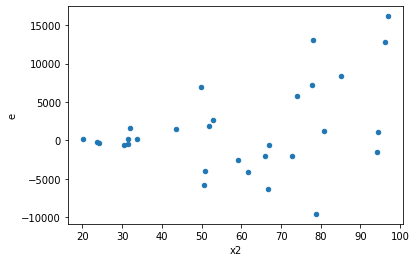

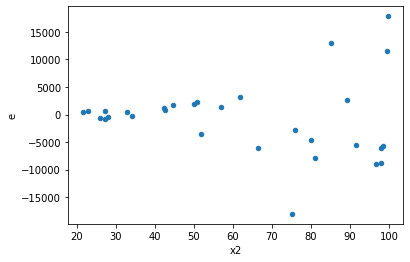

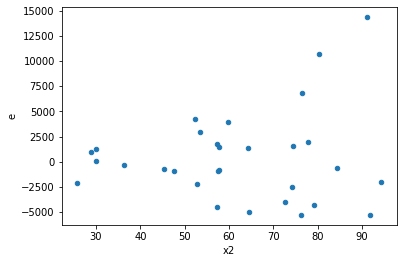

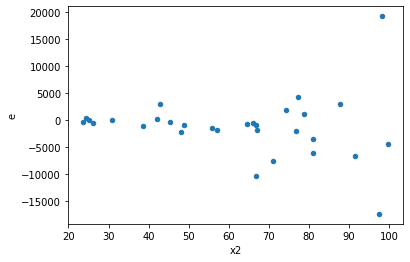

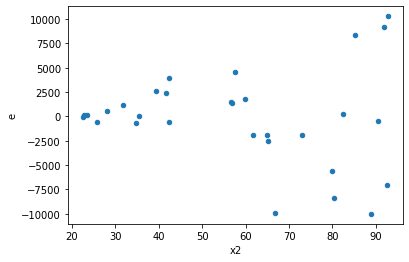

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,8.0,8.0,103293440.90896405,104750914.32290798,12911680.113620507,13093864.290363498,1.014110028682542,0.984676024391415,0.5076619878042925,0.4923380121957075,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,21261821.064021952,370965301.008417,2657727.633002744,46370662.62605213,17.447484855196315,0.0005292955748790185,0.9997353522125605,0.00026464778743950923,Reject001=0 : Heteroscedasticity
4.0,8.0,8.0,11449667.51578718,455075827.2517375,1431208.4394733976,56884478.406467184,39.745767868303936,2.393065686279172e-05,0.9999880346715686,1.196532843139586e-05,Reject001=0 : Heteroscedasticity
5.0,8.0,8.0,24642346.30414252,262408517.07141778,3080293.288017815,32801064.633927222,10.648682306169254,0.0030731804664747564,0.9984634097667626,0.0015365902332373782,Reject001=0 : Heteroscedasticity
7.0,8.0,8.0,51254255.08789718,337808232.5797134,6406781.885987148,42226029.072464176,6.590832936707358,0.01512168636550415,0.9924391568172479,0.007560843182752075,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,208547209.2884569,229647724.50388464,26068401.16105711,28705965.56298558,1.101178602616744,0.894908645670085,0.5525456771649575,0.4474543228350425,Reject001=1 : Homoscedasticity
10.0,8.0,8.0,18588319.998790164,96729800.44834813,2323539.9998487704,12091225.056043517,5.203794665394391,0.03131795367117629,0.9843410231644119,0.015658976835588145,Reject001=1 : Homoscedasticity
11.0,8.0,8.0,270185679.31498677,286267057.76414955,33773209.914373346,35783382.22051869,1.0595197291356617,0.9368344387734115,0.5315827806132942,0.4684172193867058,Reject001=1 : Homoscedasticity
12.0,8.0,8.0,236778770.09905547,287488636.23822373,29597346.262381934,35936079.52977797,1.2141655948206589,0.7903821044471386,0.6048089477764307,0.3951910522235693,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,193039794.01714718,60143786.952739865,24129974.252143398,7517973.369092483,0.3115615993011133,0.11927174659852349,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,148763451.20081052,7102145.633340157,18595431.400101315,887768.2041675196,0.04774119971009023,0.00026999289127575723,Reject001=0 : Heteroscedasticity
2.0,8.0,8.0,103293440.90896405,104750914.32290798,12911680.113620507,13093864.290363498,1.014110028682542,0.984676024391415,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,21261821.064021952,370965301.008417,2657727.633002744,46370662.62605213,17.447484855196315,0.0005292955748790185,Reject001=0 : Heteroscedasticity
4.0,8.0,8.0,11449667.51578718,455075827.2517375,1431208.4394733976,56884478.406467184,39.745767868303936,2.393065686279172e-05,Reject001=0 : Heteroscedasticity
5.0,8.0,8.0,24642346.30414252,262408517.07141778,3080293.288017815,32801064.633927222,10.648682306169254,0.0030731804664747564,Reject001=0 : Heteroscedasticity
6.0,8.0,8.0,672759033.1593878,180469321.16091645,84094879.14492348,22558665.145114556,0.2682525425387492,0.08076101259905312,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,51254255.08789718,337808232.5797134,6406781.885987148,42226029.072464176,6.590832936707358,0.01512168636550415,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,208547209.2884569,229647724.50388464,26068401.16105711,28705965.56298558,1.101178602616744,0.894908645670085,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      711
Reject001=0 : Heteroscedasticity    289
Name: Result_test, dtype: int64